[Home](../../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle

####  Step 2

Load the model for testing

In [20]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


(Optional) Load a second model if you want to do comparative testing

In [ ]:
filename = 'my_saved_model_v2.sav'
model_B = pickle.load(open(filename, 'rb'))

####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [21]:
x_col = 'BMI'
testing_data = pd.read_csv('2.4.1.testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Target'])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

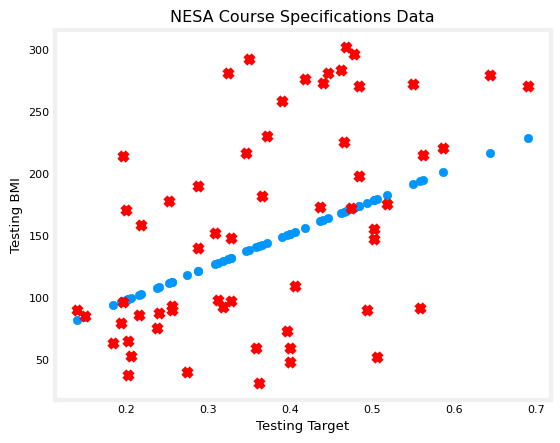

In [22]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [23]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.2254411700186304


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [30]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

         DoB    DoT  Predicted result    Loss
0   0.396875   73.0        150.245710  -77.25
1   0.406250  109.0        152.749564  -43.75
2   0.287500  140.0        121.034073   18.97
3   0.350000  292.0        137.726437  154.27
4   0.218750  158.0        102.672472   55.33
5   0.550000  272.0        191.142002   80.86
6   0.365625  182.0        141.899528   40.10
7   0.309375  152.0        126.876400   25.12
8   0.312500   98.0        127.711018  -29.71
9   0.462500  283.0        167.772692  115.23
10  0.237500   75.0        107.680181  -32.68
11  0.140625   90.0         81.807017    8.19
12  0.518750  175.0        182.795820   -7.80
13  0.215625   86.0        101.837854  -15.84
14  0.478125  296.0        171.945783  124.05
15  0.465625  225.0        168.607310   56.39
16  0.475000  172.0        171.111165    0.89
17  0.446875  281.0        163.599601  117.40
18  0.390625  258.0        148.576473  109.42
19  0.400000   48.0        151.080328 -103.08
20  0.206250   53.0         99.333

You may want to do some manual predictions to understand your model.

In [31]:
print(model_A.predict([[0.1]]))
print(model_A.predict([[1]]))

[70.95698039]
[311.32702279]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [32]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: 44.24919790499317
Coefficient: [267.07782489]


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [ ]:
filename = 'my_saved_model_usingrisk.sav'
model_C = pickle.load(open(filename, 'rb'))

In [44]:
# Optional
filename = 'my_saved_model_v2.sav'
model_D = pickle.load(open(filename, 'rb'))

In [36]:
mx_col = ['BMI','BGU','CombRisk']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

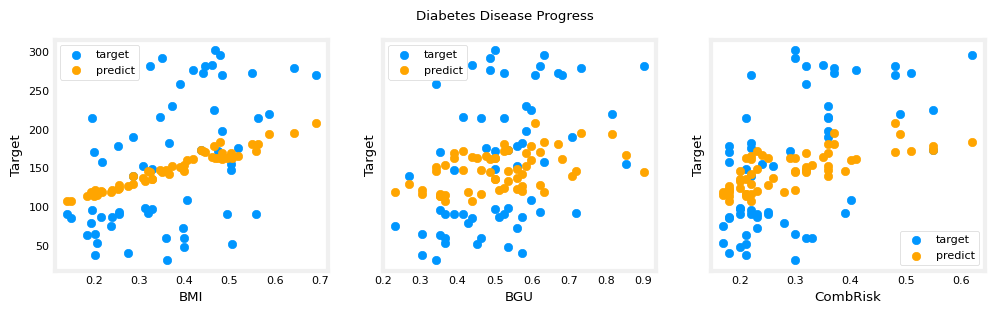

In [37]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [38]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.2440844419476208


In [38]:
print(model_C.predict([[0.1,0.1,0.1]]))
print(model_C.predict([[1,0.5,1]]))

[92.69246604]
[285.3139138]


In [39]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

    Risk%  FHRisk  CombRisk  Target  Predicted result    Cost
0    0.54    0.15      0.23    73.0        167.622475  -94.62
1    0.60    0.38      0.40   109.0        188.085039  -79.09
2    0.11    0.62      0.22   140.0        104.087908   35.91
3    0.36    0.38      0.30   292.0        145.622791  146.38
4    0.28    0.15      0.18   158.0        125.098879   32.90
5    0.52    0.38      0.37   272.0        174.129652   97.87
6    0.44    0.15      0.22   182.0        151.817479   30.18
7    0.30    0.38      0.26   152.0        134.113099   17.89
8    0.33    0.15      0.20    98.0        133.895507  -35.90
9    0.48    0.38      0.35   283.0        166.853915  116.15
10   0.23    0.15      0.17    75.0        116.898338  -41.90
11   0.12    0.62      0.22    90.0        105.608799  -15.61
12   0.44    0.15      0.22   175.0        151.817479   23.18
13   0.13    0.62      0.23    86.0        107.725777  -21.73
14   0.67    0.62      0.62   296.0        213.101263   82.90
15   0.5

In [24]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: 70.99932314700064
Coefficient: [152.08908776   5.23367654  59.60866462]


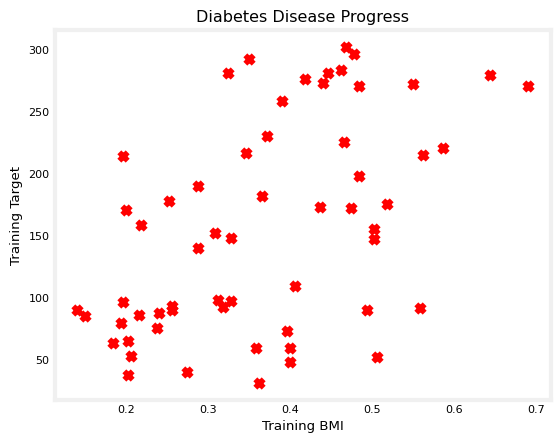

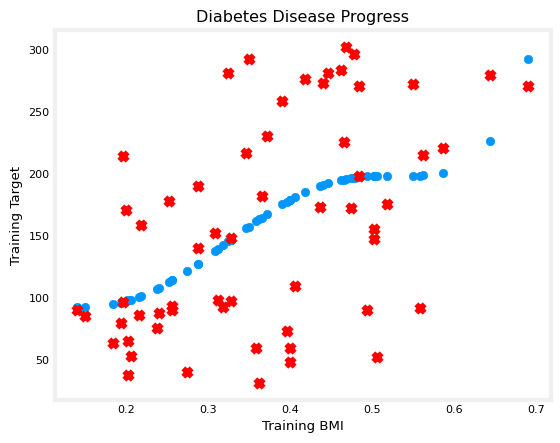

In [ ]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

filename = 'my_saved_model_poly.sav'
# Create a data frame from the csv file
training_data = pd.read_csv('2.4.1.testing_data.csv')

x_name = ['BMI']
y_name = 'Target'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])
if(len(x_name) == 1):
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Diabetes Disease Progress")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3))
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("Diabetes Disease Progress")
plt.show()
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(x)

# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(poly_features, y)

y_pred = my_model.predict(poly_features)
if(len(x_name) == 1):
    plt.scatter(x, y_pred)
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Diabetes Disease Progress")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
        ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("Diabetes Disease Progress")
plt.show()


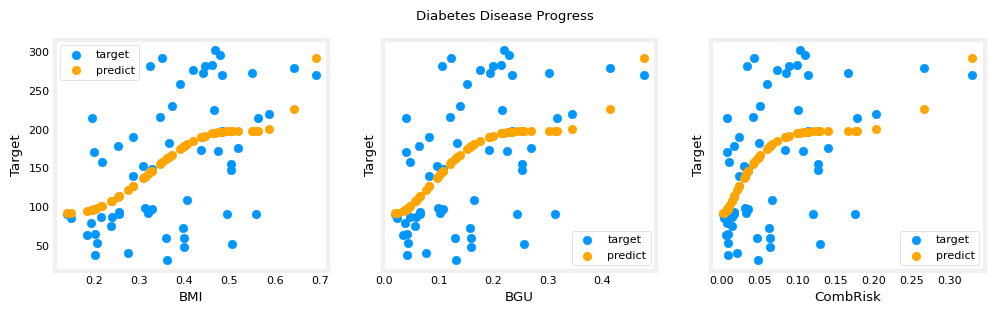

Training data score: 0.27660194466383015


In [129]:
my_pred = my_model.predict(poly_features)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(poly_features[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(poly_features[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

test_score = my_model.score(poly_features, my_test)
print(f'Training data score: {test_score}')

#### Step 10

When your model is ready for operations, move it to the [3.Operations\3.1.Deploy_Model](\3.Operations\3.1.Deploy_Model) folder.